In [14]:
#https://www.kaggle.com/code/abdalrhmantwfik/ann-knn-task/notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import r2_score , accuracy_score, mean_squared_error ,confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv("../../../data/datasets/cancer-breast.csv")

In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


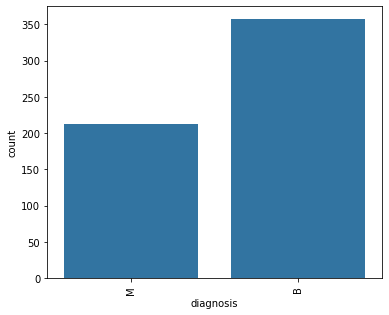

In [21]:
plt.figure(figsize=(6,5))
sns.countplot(x='diagnosis',data=df )
plt.xticks(rotation=90)
plt.show()

In [22]:
print("The Number of null values")
df.isnull().sum()

The Number of null values


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

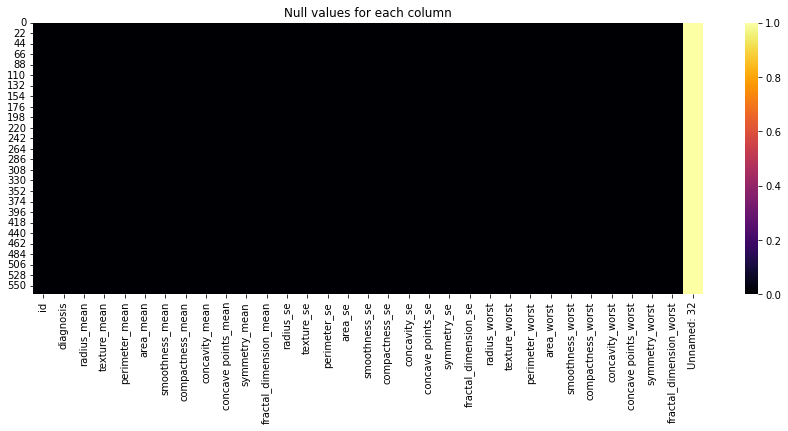

In [23]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap="inferno")
plt.title("Null values for each column")
plt.show()

In [24]:
# First : drop all the columns which don't affect on the output (prediction)
df.drop(columns=['Unnamed: 32','id'],inplace=True)

In [25]:
encoder_obj = LabelEncoder()
categorecal_columns = df.select_dtypes(include=['object','category']).columns.tolist()  # Select the categorical columns
for col in categorecal_columns:
    df[col]= encoder_obj.fit_transform(df[col])    # replace each encoded column with it's categorecal column with the same name

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [27]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


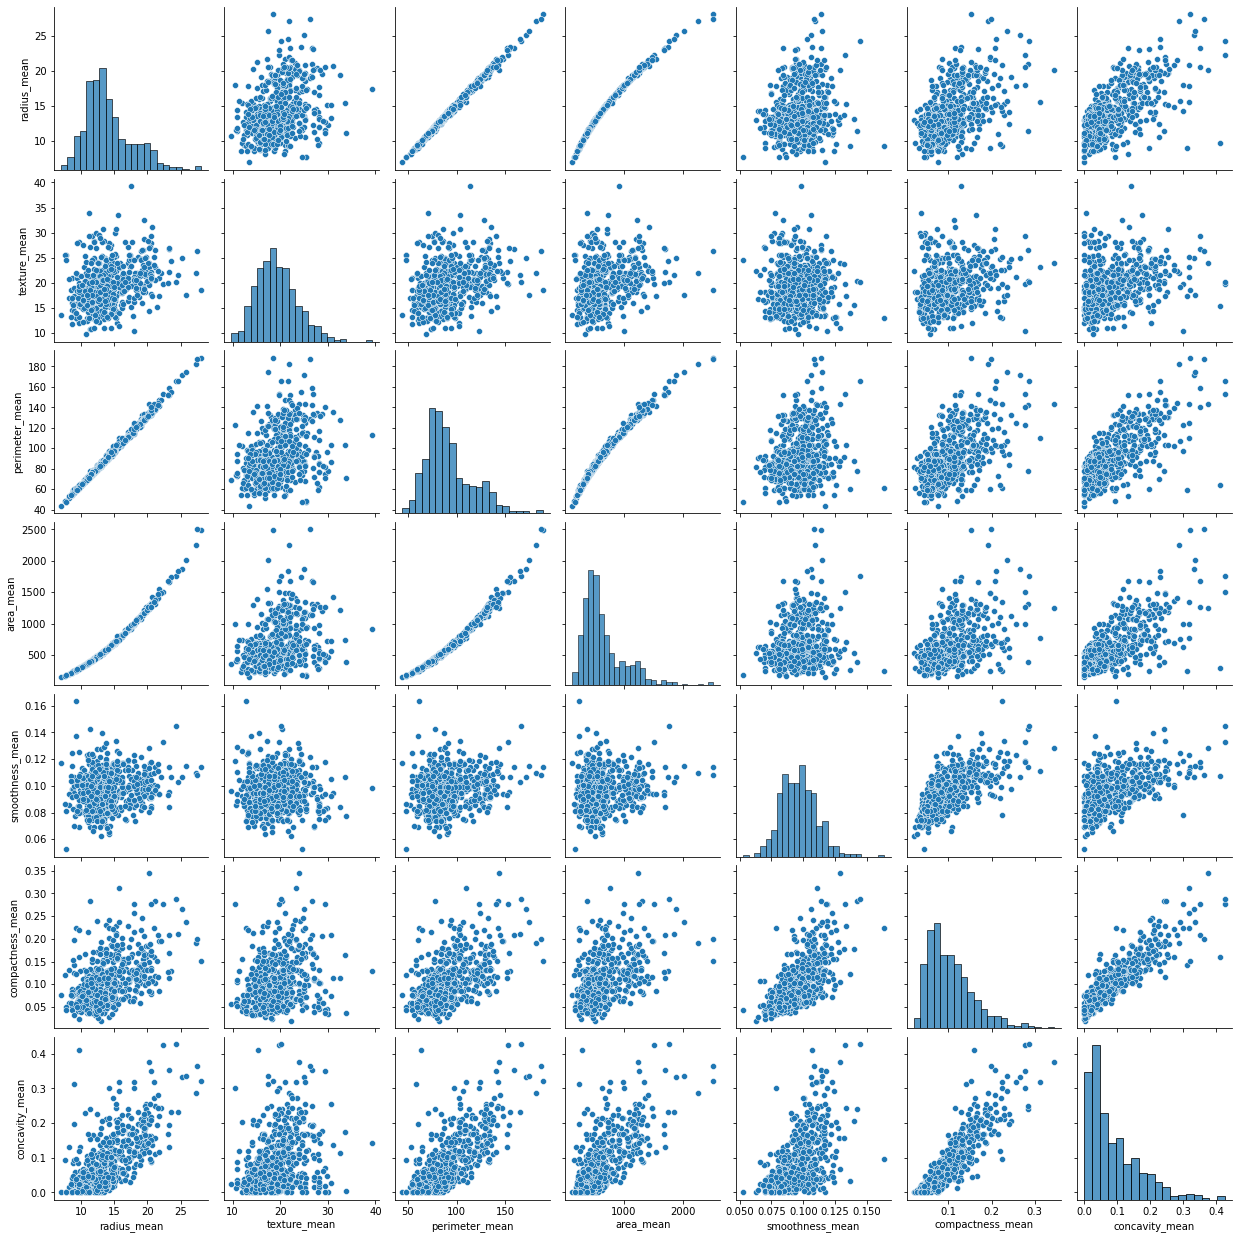

In [28]:
# Distribution of some features 
sns.pairplot(df.iloc[:,1:8])

In [29]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data,columns = df.columns)

In [51]:
df.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
5,1.0,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,...,0.268232,0.312633,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939
6,1.0,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
7,1.0,0.318472,0.376057,0.320710,0.184263,0.598267,0.445126,0.219447,0.297465,0.573737,...,0.324795,0.429638,0.299766,0.174941,0.622268,0.330753,0.213898,0.534708,0.321506,0.393939
8,1.0,0.284869,0.409537,0.302052,0.159618,0.674099,0.533157,0.435567,0.464861,0.651515,...,0.268943,0.498667,0.277852,0.136183,0.654626,0.497531,0.430511,0.707904,0.554504,0.342123
9,1.0,0.259312,0.484613,0.277659,0.140997,0.595558,0.675480,0.532568,0.424602,0.489899,...,0.254714,0.763859,0.235271,0.129326,0.753682,1.000000,0.882588,0.759450,0.552139,1.000000


In [58]:
X = df.drop(columns =['diagnosis'] )
y = df.diagnosis  

In [59]:
print(X.shape)
y.shape

(569, 30)


(569,)

In [60]:
# To make the y the same shape of X ( 2D )
y = y.values.reshape((-1,1))                           # .values : is used to convert from Numpy to dataframe
print(X.shape)
y.shape

(569, 30)


(569, 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ,shuffle=True)

In [36]:
model_ANN = Sequential([
    Dense(30,activation='relu',input_dim=30),          
    Dense(15,activation='relu'),                    
    Dense(1,activation='sigmoid')                    
])

model_ANN.compile(optimizer='adam' , loss='mean_squared_error' , metrics=['accuracy']) 

In [37]:
model_ANN.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1411 (5.51 KB)
Trainable params: 1411 (5.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
history = model_ANN.fit(X_train,y_train,epochs=150,validation_split=0.2)  

Epoch 1/150
12/12 [==============================] - 0s 11ms/step - loss: 0.0070 - accuracy: 0.9945 - val_loss: 0.0242 - val_accuracy: 0.9670
Epoch 2/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 0.9945 - val_loss: 0.0243 - val_accuracy: 0.9670
Epoch 3/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 0.9945 - val_loss: 0.0271 - val_accuracy: 0.9670
Epoch 4/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.9945 - val_loss: 0.0237 - val_accuracy: 0.9780
Epoch 5/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 0.9945 - val_loss: 0.0250 - val_accuracy: 0.9670
Epoch 6/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.9945 - val_loss: 0.0244 - val_accuracy: 0.9670
Epoch 7/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0069 - accuracy: 0.9945 - val_loss: 0.0271 - val_accuracy: 0.9670
Epoch 8/150


Epoch 59/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.9945 - val_loss: 0.0234 - val_accuracy: 0.9780
Epoch 60/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.9945 - val_loss: 0.0256 - val_accuracy: 0.9670
Epoch 61/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.9945 - val_loss: 0.0238 - val_accuracy: 0.9670
Epoch 62/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0052 - accuracy: 0.9945 - val_loss: 0.0260 - val_accuracy: 0.9670
Epoch 63/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.9945 - val_loss: 0.0247 - val_accuracy: 0.9670
Epoch 64/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.9945 - val_loss: 0.0239 - val_accuracy: 0.9670
Epoch 65/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.9945 - val_loss: 0.0259 - val_accuracy: 0.9670
Epoch 

12/12 [==============================] - 0s 7ms/step - loss: 0.0043 - accuracy: 0.9973 - val_loss: 0.0241 - val_accuracy: 0.9670
Epoch 117/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0043 - accuracy: 0.9973 - val_loss: 0.0229 - val_accuracy: 0.9670
Epoch 118/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0043 - accuracy: 0.9973 - val_loss: 0.0225 - val_accuracy: 0.9670
Epoch 119/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 0.9973 - val_loss: 0.0241 - val_accuracy: 0.9670
Epoch 120/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0042 - accuracy: 0.9973 - val_loss: 0.0227 - val_accuracy: 0.9670
Epoch 121/150
12/12 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 0.9973 - val_loss: 0.0237 - val_accuracy: 0.9670
Epoch 122/150
12/12 [==============================] - 0s 8ms/step - loss: 0.0043 - accuracy: 0.9973 - val_loss: 0.0223 - val_accuracy: 0.9670
Epoch 123/150

In [40]:
tr_loss=history.history['loss']
val_loss=history.history['val_loss']   

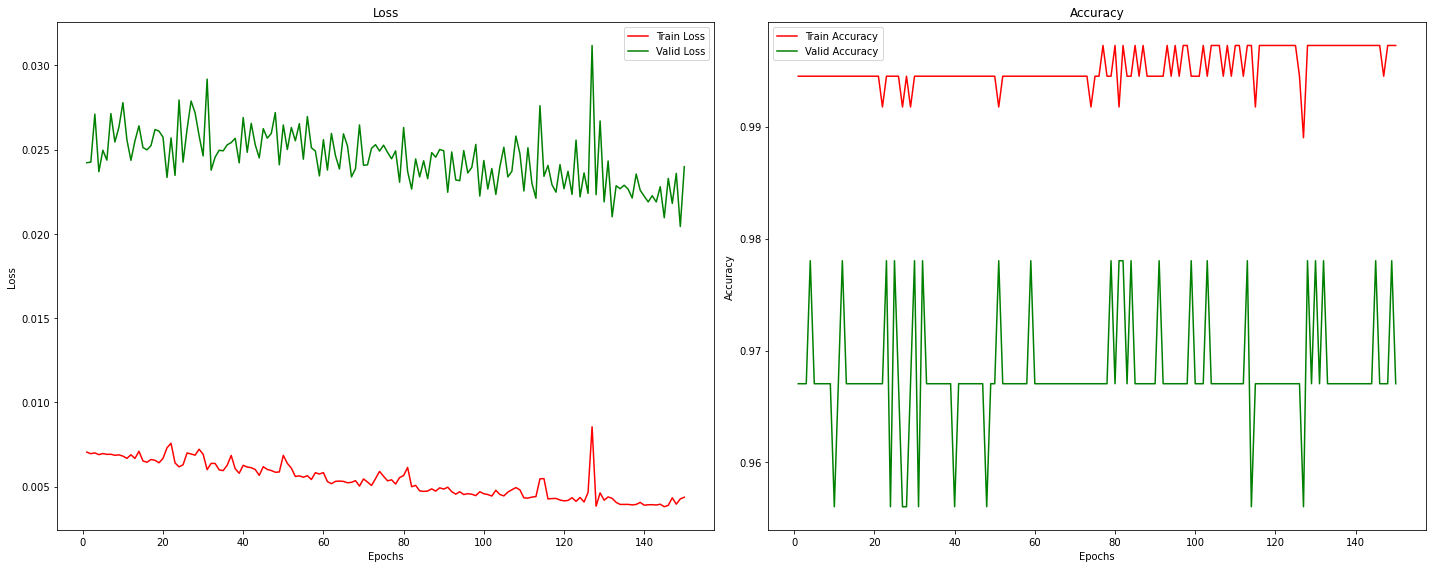

In [41]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [42]:
y_pred = model_ANN.predict(X_test)
y_predd = (y_pred > 0.5) 

4/4 [==============================] - 0s 3ms/step


In [43]:
cm =confusion_matrix(y_test,y_predd)
cm

array([[68,  3],
       [ 3, 40]])

In [44]:
mean_squared_error(y_test,y_pred)

0.03274236830274593

In [45]:
r2_score(y_test,y_pred)   

0.8606223981452714

In [62]:
model_Knn = KNeighborsClassifier(n_neighbors=2)

In [63]:
model_Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [64]:
y_pred_knn = model_Knn.predict(X_test)

In [65]:
accuracy_score(y_test, y_pred_knn)

0.9736842105263158